In [ ]:
# Train the model
%run -i "train.py"

INFO: Using device cpu
INFO: Creating dataset with 630 examples
INFO: Creating dataset with 70 examples
INFO: Starting training:
        Epochs:          20
        Batch size:      1
        Learning rate:   7e-06
        Training size:   630
        Validation size: 70
        Checkpoints:     True
        Device:          cpu
        Images scaling:  1
    
Validation round:   0%|                                                                      | 0/70 [00:00<?, ?batch/s]

-------------------------Training loss:  0.24114793184257688



Validation round: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:47<00:00,  1.50batch/s]
                                                                                                                       INFO: Validation cross entropy: 0.11012762486934662
Epoch 1/20: 100%|██████████████████████████████████████████████| 630/630 [22:47<00:00,  2.17s/img, loss (batch)=0.0741]
INFO: Checkpoint 1 saved !
Epoch 2/20:   0%|                                                                             | 0/630 [00:00<?, ?img/s]

Decreased loss from  100.0  to  0.11012762486934662


Validation round:   0%|                                                                      | 0/70 [00:00<?, ?batch/s]

-------------------------Training loss:  0.06187798377747337



Validation round: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:48<00:00,  1.46batch/s]
                                                                                                                       INFO: Validation cross entropy: 0.0626572023944131
Epoch 2/20: 100%|██████████████████████████████████████████████| 630/630 [23:54<00:00,  2.28s/img, loss (batch)=0.0137]
INFO: Checkpoint 2 saved !
Epoch 3/20:   0%|                                                                             | 0/630 [00:00<?, ?img/s]

Decreased loss from  0.11012762486934662  to  0.0626572023944131


Validation round:   0%|                                                                      | 0/70 [00:00<?, ?batch/s]

-------------------------Training loss:  0.03472751667575231



Validation round: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:49<00:00,  1.49batch/s]
                                                                                                                       INFO: Validation cross entropy: 0.05199958806458328
Epoch 3/20: 100%|██████████████████████████████████████████████| 630/630 [23:05<00:00,  2.20s/img, loss (batch)=0.0666]
INFO: Checkpoint 3 saved !
Epoch 4/20:   0%|                                                                             | 0/630 [00:00<?, ?img/s]

Decreased loss from  0.0626572023944131  to  0.05199958806458328


Epoch 4/20:  46%|████████████████████▊                        | 291/630 [10:26<12:06,  2.14s/img, loss (batch)=0.00804]

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from data.split import split_image, join_image

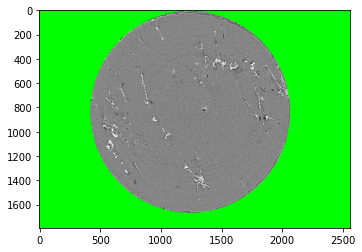

In [2]:
# Select and display the input image
# The input image is the full image (before splitting) and located in data/test_data
test_dir = "data/test_data/"
filename = "vol55_recon_00936_RGB.png"

test_input = Image.open(test_dir + filename, 'r')
plt.imshow(test_input)

In [3]:
# Splits up the input image and predicts the label mask on it
tilesize = 256

import os
if os.path.exists(test_dir + filename):
    im = Image.open(test_dir + filename)
    width = im.width
    height = im.height
    im.close()
    split_image(test_dir + filename, tilesize)
    os.remove(test_dir + filename)
    %run -i "predict.py"
else:
    print("The file does not exist") 

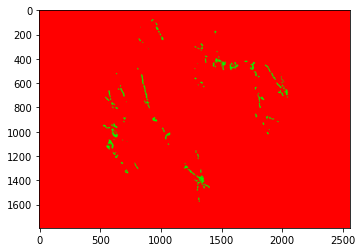

In [4]:
# Concatenates the output result and displays it

join_image(filename, width, height, tilesize, True) # join original image
join_image(filename, width, height, tilesize, False) # join output mask
test_output = Image.open(test_dir + filename[:-4] + "_OUT.png", 'r')
plt.imshow(test_output)